### train 1k, test1k, SVM

In [1]:
# import from

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import folium
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")
    

In [67]:
train = pd.read_csv('../Data/train_1k.csv', header=None)
test = pd.read_csv('../Data/test_1k.csv', header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 6.0 MB


In [8]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 6.0 MB


In [22]:
# train 정답의 숫자 빈도 확인 (0번째 컬럼)
print(train[0].value_counts().sort_index(axis=0,ascending=False))
print(train[0].value_counts().sum())

9    100
8     87
7    117
6     94
5     92
4    105
3     93
2     99
1    116
0     98
Name: 0, dtype: int64
1001


In [27]:
# train data의 내용 보기
temp = np.array(train.loc[0, train.columns != 0])
print(temp.reshape(28,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [28]:
# 너무 커서 안나오니까 사이즈를 줄이려고 함 

tempColumns = []
temp1 = temp.reshape(28,28)
count = 0 # row수 

for i in range(0,29):
    if i%2 == 1:
        for j in range(0,29):
            if j%2 == 1:
                tempColumns.append(temp1[i,j])
                count += 1
count

# 가로 세로를 반씩 줄임.

196

In [29]:
np.sqrt(count)
#row 수를 sqrt 해서 나오는 값이 reshape의 가로세로 값이 짜잔 

14.0

In [30]:
print(np.array(tempColumns).reshape(14,14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [68]:
train_label = train.loc[:,train.columns == 0]
train_data = train.loc[:, train.columns != 0]
test_label = test.loc[:,test.columns == 0]
test_data = test.loc[:, test.columns != 0]

In [32]:
# 학습하기
from sklearn import svm
clf = svm.SVC() # 지금은 분류하는거

In [33]:
clf.fit(train_data, train_label)

SVC()

In [34]:
clf.score(test_data,test_label)

0.8751248751248751

In [35]:
import matplotlib.pyplot as plt

예측력 87을 향상시켜보자

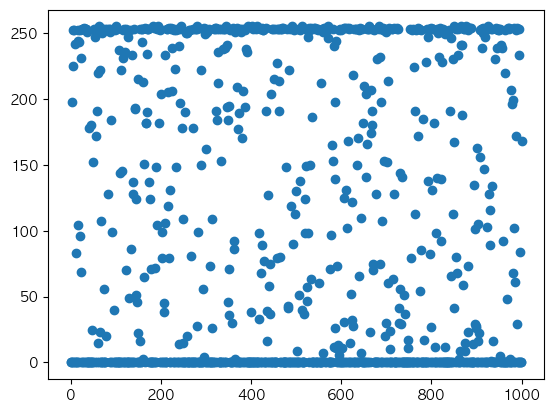

In [42]:
plt.scatter(train_data.index, train_data[300])
plt.show()

In [43]:
train_data[300]

0         0
1         0
2       198
3         0
4       225
       ... 
996       0
997      84
998       0
999       0
1000    168
Name: 300, Length: 1001, dtype: int64

### 로그 변환
: 제곱의 거꾸로 ..? 큰 값을 작은 값으로 표시하는게 로그 임 (* 미분 *)


기본적으로 log안의 x값은 양수만 가능.     
하지만 0에 가까운 아주 작은 양수의 경우 (ex:0.0000000001)
음의 무한대에 가까워지게 됨.(너무 작은값의 경우 프로그램 계산이 -inf으로 나옴)      
이를 방지하기 위해 1을 더함으로서 0보다 큰 양수의 값을 갖게 된다.

그래서 log1p 는 log에 +1 한거임 


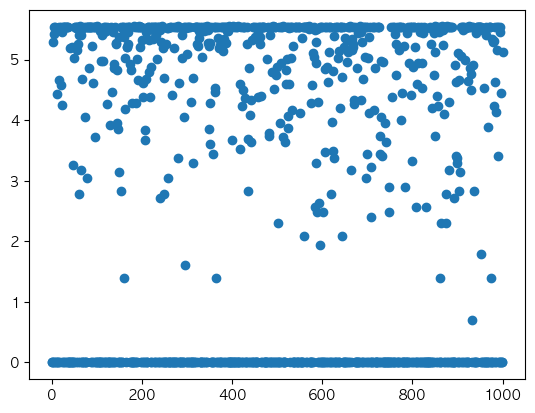

In [46]:
plt.scatter(
    train_data.index,
    np.log1p(train_data[300]) #<<<<< 이거 표준화 한거임 
);plt.show()

In [71]:
# data의 표준화
train_data = pd.DataFrame(np.log1p(train_data))
test_data = pd.DataFrame(np.log1p(test_data))
# 죄다 0이 되버렸네..?

In [72]:
train_data = train_data.loc[:, train_data.columns != 0]
test_data = test_data.loc[:, test_data.columns != 0]

In [73]:
# 학습하기
from sklearn import svm
clf = svm.SVC() # 지금은 분류하는거
clf.fit(train_data, train_label)
clf.score(test_data,test_label)

0.8931068931068931